In [7]:
import os
import pandas as pd
import numpy as np
#import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.regularizers import l2
from keras.optimizers import Adam
import tensorflow as tf
from keras import layers
import keras


In [196]:
from datetime import datetime
from dateutil import parser

def date_to_day_number(date):
    date_number = parser.parse(date)
    return date_number.timetuple().tm_yday

In [300]:
from keras import backend as K

def Rsquared(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [407]:

all_columns = ['current_price', 'days_before_departure', 'departure_date', 'direction',
       'train_number', 'demand', 'od_destination_time_year',
       'od_destination_time_month', 'od_destination_time_week',
       'od_destination_time_day', 'od_destination_time_weekday',
       'od_destination_time_hour', 'od_destination_time_minute',
       'od_origin_time_hour', 'od_origin_time_minute', 'od_time_travel']

columns_ready = ['current_price','days_before_departure', 'od_destination_time_month', 
                 'od_destination_time_week', 'od_destination_time_day', 'od_destination_time_weekday',
                'od_time_travel']

DATA_PATH = "/Users/mykola/MLHEP/Wiremind/"
all_features = pd.read_csv(os.path.join(DATA_PATH, "ds_train.csv"))

train_features = pd.read_csv(os.path.join(DATA_PATH, "ds_train.csv"),usecols=columns)
target = pd.read_csv(os.path.join(DATA_PATH, "ds_train.csv"),usecols=["demand"])

In [517]:

print(all_features.columns)
all_features["direction"].unique()
official_holidays_2018 = ["2018-04-02", "2018-05-01", "2018-05-08", "2018-05-10",
                         "2018-05-21", "2018-07-14", "2018-08-15", "2018-11-01",
                         "2018-11-11", "2018-12-25"]
unofficial_holidays_2018 = ["2018-01-06", "2018-02-02", "2018-02-13","2018-02-14" ,"2018-03-04",
                         "2018-03-17", "2018-05-16", "2018-05-27", "2018-06-17",
                         "2018-06-21", "2018-06-24","2018-09-19","2018-10-07", "2018-12-02"]
official_holidays_2019 = ["2019-04-22", "2019-05-01", "2019-05-08", "2019-05-30",
                         "2019-06-10", "2019-07-14", "2019-08-15", "2019-11-01",
                         "2019-11-11", "2019-12-25"]
unofficial_holidays_2019 = ["2019-01-06", "2019-02-02", "2019-02-14", "2019-03-03",
                         "2019-03-05", "2019-03-17", "2019-05-06", "2019-05-26",
                         "2019-06-16", "2019-06-21","2019-06-24","2019-10-06", "2019-10-09","2019-12-22"]


Index(['current_price', 'days_before_departure', 'departure_date', 'direction',
       'train_number', 'demand', 'od_destination_time_year',
       'od_destination_time_month', 'od_destination_time_week',
       'od_destination_time_day', 'od_destination_time_weekday',
       'od_destination_time_hour', 'od_destination_time_minute',
       'od_origin_time_hour', 'od_origin_time_minute', 'od_time_travel',
       'od_destination_time_hourmin', 'od_origin_time_hourmin',
       'direction_bool', 'date_numerical', 'if_holiday_2018',
       'of_holiday_2018'],
      dtype='object')


In [429]:
all_features[all_features.train_number.eq(941)]

,current_price,days_before_departure,departure_date,direction,train_number,demand,od_destination_time_year,od_destination_time_month,od_destination_time_week,od_destination_time_day,od_destination_time_weekday,od_destination_time_hour,od_destination_time_minute,od_origin_time_hour,od_origin_time_minute,od_time_travel
0,100,0,2018-01-02,outbound,941,1.0,2018,1,1,2,1,7,41,5,17,144.0
1,100,1,2018-01-02,outbound,941,1.0,2018,1,1,2,1,7,41,5,17,144.0
2,100,2,2018-01-02,outbound,941,0.0,2018,1,1,2,1,7,41,5,17,144.0
3,100,3,2018-01-02,outbound,941,1.0,2018,1,1,2,1,7,41,5,17,144.0
4,100,4,2018-01-02,outbound,941,0.0,2018,1,1,2,1,7,41,5,17,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,44,25,2018-12-31,outbound,941,0.0,2018,12,1,31,0,7,40,5,28,132.0
7406,44,26,2018-12-31,outbound,941,0.0,2018,12,1,31,0,7,40,5,28,132.0
7407,44,27,2018-12-31,outbound,941,0.0,2018,12,1,31,0,7,40,5,28,132.0
7408,44,28,2018-12-31,outbound,941,0.0,2018,12,1,31,0,7,40,5,28,132.0


In [518]:
if_holiday_2018 = all_features.departure_date.isin(official_holidays_2018)
if_holiday_2018.unique()
all_features["of_holiday_2018"] =  all_features.departure_date.isin(official_holidays_2018)
all_features["of_holiday_2019"] =  all_features.departure_date.isin(official_holidays_2019)
all_features["unof_holiday_2018"] =  all_features.departure_date.isin(official_holidays_2018)
all_features["unof_holiday_2019"] =  all_features.departure_date.isin(official_holidays_2019)

#all_features[if_holiday_2018]
#all_features[all_features.departure_date.eq("2018-01-06")]

In [433]:
all_features[all_features.train_number.eq(941)][all_features[all_features.train_number.eq(941)].days_before_departure.eq(3)]

,current_price,days_before_departure,departure_date,direction,train_number,demand,od_destination_time_year,od_destination_time_month,od_destination_time_week,od_destination_time_day,od_destination_time_weekday,od_destination_time_hour,od_destination_time_minute,od_origin_time_hour,od_origin_time_minute,od_time_travel
3,100,3,2018-01-02,outbound,941,1.0,2018,1,1,2,1,7,41,5,17,144.0
33,100,3,2018-01-03,outbound,941,0.0,2018,1,1,3,2,7,39,5,17,142.0
63,100,3,2018-01-04,outbound,941,0.0,2018,1,1,4,3,7,39,5,17,142.0
93,44,3,2018-01-05,outbound,941,0.0,2018,1,1,5,4,7,39,5,17,142.0
123,100,3,2018-01-08,outbound,941,0.0,2018,1,2,8,0,7,39,5,17,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,100,3,2018-12-19,outbound,941,0.0,2018,12,51,19,2,7,40,5,28,132.0
7293,44,3,2018-12-20,outbound,941,0.0,2018,12,51,20,3,7,38,5,28,130.0
7323,44,3,2018-12-21,outbound,941,0.0,2018,12,51,21,4,7,40,5,28,132.0
7353,100,3,2018-12-27,outbound,941,0.0,2018,12,52,27,3,7,40,5,28,132.0


In [460]:
weekdays = all_features.od_destination_time_weekday.unique()


In [478]:
trainable_features = all_features[columns_ready]
all_features["od_destination_time_hourmin"] = 60*all_features["od_destination_time_hour"] + all_features["od_destination_time_minute"]
all_features["od_origin_time_hourmin"] = 60*all_features["od_origin_time_hour"] + all_features["od_origin_time_minute"]
all_features["direction_bool"] = (all_features['direction'] == "outbound").astype(int)
all_features['date_numerical'] = all_features.departure_date.apply(date_to_day_number)
columns_to_scale = columns_ready + ["od_destination_time_hourmin","od_origin_time_hourmin", 'date_numerical']
columns_not_to_scale = ["direction_bool" , "demand"]


In [383]:
columns_to_scale = columns_ready + columns_additional
features_scaled = all_features [columns_to_scale] 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
features_scaled.loc[:, columns_to_scale] = sc.fit_transform(features_scaled.loc[:, columns_to_scale])
print (features_scaled.loc[:, columns_to_scale])

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


        current_price  days_before_departure  od_destination_time_month  \
0            0.788732               0.000000                        0.0   
1            0.788732               0.034483                        0.0   
2            0.788732               0.068966                        0.0   
3            0.788732               0.103448                        0.0   
4            0.788732               0.137931                        0.0   
...               ...                    ...                        ...   
292645       0.000000               0.862069                        1.0   
292646       0.000000               0.896552                        1.0   
292647       0.000000               0.931034                        1.0   
292648       0.000000               0.965517                        1.0   
292649       0.000000               1.000000                        1.0   

        od_destination_time_week  od_destination_time_day  \
0                            0.0      

In [214]:
features_scaled[columns_not_to_scale] = all_features[columns_not_to_scale]
input_features = columns_to_scale + ["direction_bool"]

In [331]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

In [370]:
model = Sequential()
model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
#model.add(layers.BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
#model.add(layers.BatchNormalization())
model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
#model.add(layers.BatchNormalization())
model.add(Dense(1, activation='linear', kernel_initializer='random_normal'))
#model.compile(optimizer =Adam(lr=0.001),loss=[r_square_loss], metrics =['MSE','MAE'])
model.compile(optimizer =Adam(lr=0.001),loss=['MAE'], metrics =[r_square,'MAE'])

In [371]:
train_part, validation = train_test_split(features_scaled, test_size=0.2, shuffle=True, random_state=2342234)
print(train_part.shape)
print(validation.shape)
target = "demand"

(234120, 12)
(58530, 12)


In [372]:
train_part.loc[:,columns_ready].values
train_part.loc[:,columns_ready].values.shape
print (train_part.loc[:,columns_ready].values)
print (train_part.loc[:,columns_ready].values.shape)

[[ 1.42410181 -1.44417822 -1.02670178 ... -1.22648363 -1.43163645
  -0.79271522]
 [-0.8314662   1.09757545 -1.60741008 ... -0.08507611 -1.43163645
  -0.79271522]
 [-0.8314662  -1.2131097   0.1347148  ... -0.76992062 -1.43163645
   2.56662247]
 ...
 [-0.8314662   0.86650693 -0.15563935 ... -0.65577987  1.71980517
  -0.01748344]
 [ 0.81993181  0.86650693 -1.02670178 ... -1.68304664  0.14408436
  -2.73079465]
 [-0.8314662   0.75097267 -0.73634764 ...  0.25734615 -0.38115591
   1.01615892]]
(234120, 7)


In [373]:
save_all_xy = keras.callbacks.ModelCheckpoint("NNmodels/"+'weights.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
history = model.fit(train_part.loc[:,input_features].values,train_part.demand, verbose=1, callbacks=[save_all_xy], validation_data=(validation.loc[:,input_features].values, validation.demand), shuffle=True, batch_size=160, epochs=160)


Epoch 1/160
1459/1464 [============================>.] - ETA: 0s - loss: 0.2664 - r_square: 0.2834 - MAE: 1.6247
Epoch 00001: saving model to NNmodels/weights.01-0.25.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.2664 - r_square: 0.2834 - MAE: 1.6245 - val_loss: 0.2466 - val_r_square: 0.3138 - val_MAE: 1.5159
Epoch 2/160
1452/1464 [============================>.] - ETA: 0s - loss: 0.2411 - r_square: 0.3998 - MAE: 1.3816
Epoch 00002: saving model to NNmodels/weights.02-0.24.h5
1464/1464 [==============================] - 4s 2ms/step - loss: 0.2411 - r_square: 0.4005 - MAE: 1.3810 - val_loss: 0.2372 - val_r_square: 0.5165 - val_MAE: 1.2409
Epoch 3/160
1445/1464 [============================>.] - ETA: 0s - loss: 0.2326 - r_square: 0.5453 - MAE: 1.1348
Epoch 00003: saving model to NNmodels/weights.03-0.23.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.2326 - r_square: 0.5455 - MAE: 1.1335 - val_loss: 0.2255 - val_r_square: 0.6119 - val_MAE: 1.

Epoch 25/160
1461/1464 [============================>.] - ETA: 0s - loss: 0.2077 - r_square: 0.5567 - MAE: 1.1687
Epoch 00025: saving model to NNmodels/weights.25-0.21.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.2078 - r_square: 0.5558 - MAE: 1.1685 - val_loss: 0.2073 - val_r_square: 0.5141 - val_MAE: 1.2092
Epoch 26/160
1447/1464 [============================>.] - ETA: 0s - loss: 0.2074 - r_square: 0.5580 - MAE: 1.1626
Epoch 00026: saving model to NNmodels/weights.26-0.21.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.2074 - r_square: 0.5583 - MAE: 1.1623 - val_loss: 0.2099 - val_r_square: 0.5213 - val_MAE: 1.0611
Epoch 27/160
1455/1464 [============================>.] - ETA: 0s - loss: 0.2079 - r_square: 0.5403 - MAE: 1.1834
Epoch 00027: saving model to NNmodels/weights.27-0.21.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.2078 - r_square: 0.5404 - MAE: 1.1826 - val_loss: 0.2080 - val_r_square: 0.4843 - val_MAE:

Epoch 50/160
1462/1464 [============================>.] - ETA: 0s - loss: 0.2023 - r_square: 0.4498 - MAE: 1.2483
Epoch 00050: saving model to NNmodels/weights.50-0.21.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.2023 - r_square: 0.4499 - MAE: 1.2482 - val_loss: 0.2063 - val_r_square: 0.3877 - val_MAE: 1.1868
Epoch 51/160
1451/1464 [============================>.] - ETA: 0s - loss: 0.2022 - r_square: 0.4905 - MAE: 1.2115
Epoch 00051: saving model to NNmodels/weights.51-0.21.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.2022 - r_square: 0.4908 - MAE: 1.2121 - val_loss: 0.2070 - val_r_square: 0.3562 - val_MAE: 1.3128
Epoch 52/160
1452/1464 [============================>.] - ETA: 0s - loss: 0.2021 - r_square: 0.4395 - MAE: 1.2612
Epoch 00052: saving model to NNmodels/weights.52-0.21.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.2022 - r_square: 0.4391 - MAE: 1.2612 - val_loss: 0.2063 - val_r_square: 0.3584 - val_MAE:

Epoch 75/160
1445/1464 [============================>.] - ETA: 0s - loss: 0.1988 - r_square: 0.4735 - MAE: 1.2326
Epoch 00075: saving model to NNmodels/weights.75-0.21.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.1988 - r_square: 0.4731 - MAE: 1.2330 - val_loss: 0.2065 - val_r_square: 0.2792 - val_MAE: 1.3001
Epoch 76/160
1460/1464 [============================>.] - ETA: 0s - loss: 0.1984 - r_square: 0.4651 - MAE: 1.2420
Epoch 00076: saving model to NNmodels/weights.76-0.20.h5
1464/1464 [==============================] - 5s 3ms/step - loss: 0.1984 - r_square: 0.4646 - MAE: 1.2420 - val_loss: 0.2041 - val_r_square: 0.4380 - val_MAE: 1.1821
Epoch 77/160
1457/1464 [============================>.] - ETA: 0s - loss: 0.1982 - r_square: 0.4732 - MAE: 1.2349
Epoch 00077: saving model to NNmodels/weights.77-0.21.h5
1464/1464 [==============================] - 6s 4ms/step - loss: 0.1982 - r_square: 0.4734 - MAE: 1.2348 - val_loss: 0.2055 - val_r_square: 0.4516 - val_MAE:

Epoch 100/160
1442/1464 [============================>.] - ETA: 0s - loss: 0.1961 - r_square: 0.4172 - MAE: 1.2542
Epoch 00100: saving model to NNmodels/weights.100-0.20.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.1962 - r_square: 0.4175 - MAE: 1.2553 - val_loss: 0.2050 - val_r_square: 0.0017 - val_MAE: 1.2872
Epoch 101/160
1446/1464 [============================>.] - ETA: 0s - loss: 0.1961 - r_square: 0.4234 - MAE: 1.2427
Epoch 00101: saving model to NNmodels/weights.101-0.21.h5
1464/1464 [==============================] - 4s 2ms/step - loss: 0.1963 - r_square: 0.4202 - MAE: 1.2428 - val_loss: 0.2077 - val_r_square: 0.0324 - val_MAE: 1.3071
Epoch 102/160
1460/1464 [============================>.] - ETA: 0s - loss: 0.1963 - r_square: 0.4014 - MAE: 1.2671
Epoch 00102: saving model to NNmodels/weights.102-0.20.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.1963 - r_square: 0.4007 - MAE: 1.2672 - val_loss: 0.2049 - val_r_square: 0.0900 - va

1453/1464 [============================>.] - ETA: 0s - loss: 0.1944 - r_square: 0.3475 - MAE: 1.3105
Epoch 00124: saving model to NNmodels/weights.124-0.21.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.1945 - r_square: 0.3475 - MAE: 1.3098 - val_loss: 0.2062 - val_r_square: 0.1255 - val_MAE: 1.3433
Epoch 125/160
1462/1464 [============================>.] - ETA: 0s - loss: 0.1940 - r_square: 0.3747 - MAE: 1.2868
Epoch 00125: saving model to NNmodels/weights.125-0.21.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.1940 - r_square: 0.3721 - MAE: 1.2871 - val_loss: 0.2060 - val_r_square: 0.2487 - val_MAE: 1.3132
Epoch 126/160
1445/1464 [============================>.] - ETA: 0s - loss: 0.1952 - r_square: 0.3923 - MAE: 1.2908
Epoch 00126: saving model to NNmodels/weights.126-0.21.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.1951 - r_square: 0.3912 - MAE: 1.2899 - val_loss: 0.2054 - val_r_square: -0.2194 - val_MAE: 1.2771

1456/1464 [============================>.] - ETA: 0s - loss: 0.1926 - r_square: 0.3463 - MAE: 1.3139
Epoch 00148: saving model to NNmodels/weights.148-0.21.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.1927 - r_square: 0.3471 - MAE: 1.3136 - val_loss: 0.2067 - val_r_square: -0.0287 - val_MAE: 1.3184
Epoch 149/160
1448/1464 [============================>.] - ETA: 0s - loss: 0.1928 - r_square: 0.3794 - MAE: 1.2979
Epoch 00149: saving model to NNmodels/weights.149-0.21.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.1928 - r_square: 0.3778 - MAE: 1.2989 - val_loss: 0.2060 - val_r_square: 0.1755 - val_MAE: 1.3069
Epoch 150/160
1462/1464 [============================>.] - ETA: 0s - loss: 0.1945 - r_square: 0.3676 - MAE: 1.3019
Epoch 00150: saving model to NNmodels/weights.150-0.21.h5
1464/1464 [==============================] - 4s 3ms/step - loss: 0.1945 - r_square: 0.3672 - MAE: 1.3018 - val_loss: 0.2063 - val_r_square: -0.2884 - val_MAE: 1.392

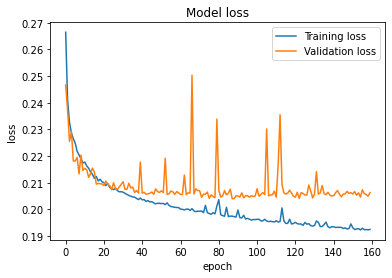

In [380]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.savefig("loss.png")
plt.show()

In [381]:
from keras.models import load_model
model = load_model("NNmodels/weights.21-0.21.h5", custom_objects={r_square})

prediction_validation = np.array(model.predict(validation.loc[:, input_features].values[:50]),dtype=float)


TypeError: cannot convert dictionary update sequence element #0 to a sequence

In [379]:
prediction_validation

array([[ 1.38718235],
       [ 0.97718269],
       [ 0.53590113],
       [-0.01729731],
       [ 0.22194135],
       [-0.08334257],
       [ 0.15999192],
       [ 0.23224995],
       [ 0.13917293],
       [-0.17167164],
       [ 0.06243001],
       [ 0.86530417],
       [ 9.22874069],
       [ 0.22463818],
       [ 0.08629123],
       [ 0.49917668],
       [ 0.73414224],
       [ 0.28863418],
       [ 0.62561953],
       [-3.75558734],
       [ 0.69958234],
       [ 0.18317102],
       [ 0.034455  ],
       [-1.25212061],
       [ 0.13788664],
       [ 0.15875593],
       [-3.12458777],
       [-0.05393678],
       [14.5353632 ],
       [ 0.5918892 ],
       [ 0.55003965],
       [ 0.18370491],
       [ 0.44962186],
       [ 0.57420152],
       [ 0.15036541],
       [ 0.03626768],
       [ 0.41754001],
       [ 0.23197986],
       [ 0.19862016],
       [ 0.09224021],
       [ 3.1408217 ],
       [ 1.04500341],
       [ 0.12794162],
       [-0.39246267],
       [-3.2282629 ],
       [ 8

In [384]:
validation[:50]

,current_price,days_before_departure,od_destination_time_month,od_destination_time_week,od_destination_time_day,od_destination_time_weekday,od_time_travel,od_destination_time_hourmin,od_origin_time_hourmin,date_numerical,direction_bool,demand
100386,0.819932,-0.982041,-1.026702,-1.098331,-0.541639,1.719805,-0.792715,0.567859,0.589341,-1.077156,1,0.0
109417,0.819932,-0.866507,0.715423,0.699122,-0.199217,0.669325,-0.146689,0.320476,0.324025,0.700153,0,0.0
117024,-0.831466,1.097575,0.134715,0.033399,-1.112343,0.669325,3.083444,0.900163,0.810439,0.034850,1,0.0
142139,-0.831466,1.675247,0.134715,0.033399,-1.340624,-0.381156,2.566622,1.328467,1.252633,0.015841,1,0.0
40871,-0.831466,-0.404370,1.005777,1.165129,1.512894,-1.431636,-0.405099,-1.222894,-1.208916,1.127848,0,0.0
269812,-0.831466,0.866507,-1.607410,-1.697482,-1.454765,-0.381156,-0.792715,1.675541,1.694828,-1.713946,1,0.0
46516,-0.831466,0.173301,-0.155639,-0.166318,-0.313358,-0.381156,-0.275894,-0.746591,-0.737242,-0.183750,1,0.0
37994,-0.831466,-0.057767,0.134715,0.099971,-0.769921,-1.431636,0.886954,-1.230278,-1.253136,0.063363,0,0.0
111566,-0.831466,1.328644,1.296131,1.364846,0.942191,1.194565,-0.146689,0.320476,0.324025,1.374960,0,0.0
115977,-0.831466,1.444178,-0.445993,-0.499180,-0.655780,0.144084,-0.275894,0.804164,0.810439,-0.506897,1,0.0


In [448]:
 (all_features.demand.sum())

395710.0

In [445]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = np.random.randint(1, 100, 5000)
x
#plt.hist(x, bins=20)
#plt.ylabel('No of times')
#plt.show()

array([36, 85, 51, ..., 54, 58, 21])

In [459]:
all_features[all_features.od_destination_time_weekday.eq(1)].demand.sum()

47836.0

In [495]:
dem_weekday = [all_features[all_features.od_destination_time_weekday.eq(x)].demand.sum() for x in all_features.od_destination_time_weekday.unique()]
dem_weekday

[47836.0, 51640.0, 56415.0, 75985.0, 44189.0, 59877.0, 59768.0]

In [502]:
dem_daysbefore = [all_features[all_features.days_before_departure.eq(x)].demand.sum() for x in all_features.days_before_departure.unique()]
dem_daysbefore

[128910.0,
 71994.0,
 29729.0,
 22823.0,
 18193.0,
 14955.0,
 12845.0,
 11473.0,
 9278.0,
 7570.0,
 6572.0,
 5701.0,
 4991.0,
 4829.0,
 4788.0,
 4409.0,
 3938.0,
 3582.0,
 3376.0,
 3074.0,
 2984.0,
 2867.0,
 2666.0,
 2417.0,
 2438.0,
 1943.0,
 1951.0,
 1843.0,
 1828.0,
 1743.0]

In [485]:
dem_date = [all_features[all_features.date_numerical.eq(x)].demand.sum() for x in all_features.date_numerical.unique()]
len(dem_date)

365

[47836.0, 51640.0, 56415.0, 75985.0, 44189.0, 59877.0, 59768.0]


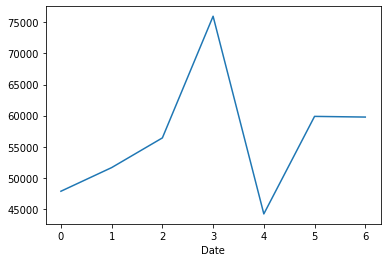

In [499]:
print(dem_weekday)
plt.plot(range(0,len(dem_weekday)),dem_weekday)
plt.xlabel('Date')
plt.show()

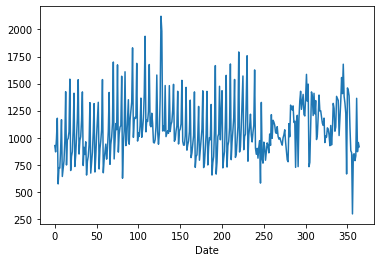

In [500]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(dem_date)),dem_date)
plt.xlabel('Date')
plt.show()


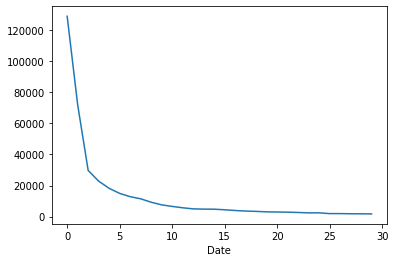

In [503]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(dem_daysbefore)),dem_daysbefore)
plt.xlabel('Date')
plt.show()